# Batch Effect detection class

In [1]:
!pip -q install ./../../BatchDetect

You should consider upgrading via the '/pstore/apps/Python/3.8.3-2020.07/bin/python -m pip install --upgrade pip' command.


## creating a multi feature multi label dataset

In [2]:
from sklearn.datasets import make_multilabel_classification as make_ml_clf
import pandas as pd

X, Y = make_ml_clf(
        n_samples=200,
        n_features=20,
        n_classes=5,
        n_labels=4,
        allow_unlabeled=False,
    )

metadata = pd.DataFrame(Y, columns=["y1","y2","y3","y4","y5"])
features = X

X = Y = None

### lets assume each label is a source of batch effect

In [3]:
from batchdetect.batchdetect import BatchDetect

bd = BatchDetect(metadata, features)

# visualization with multiple labels

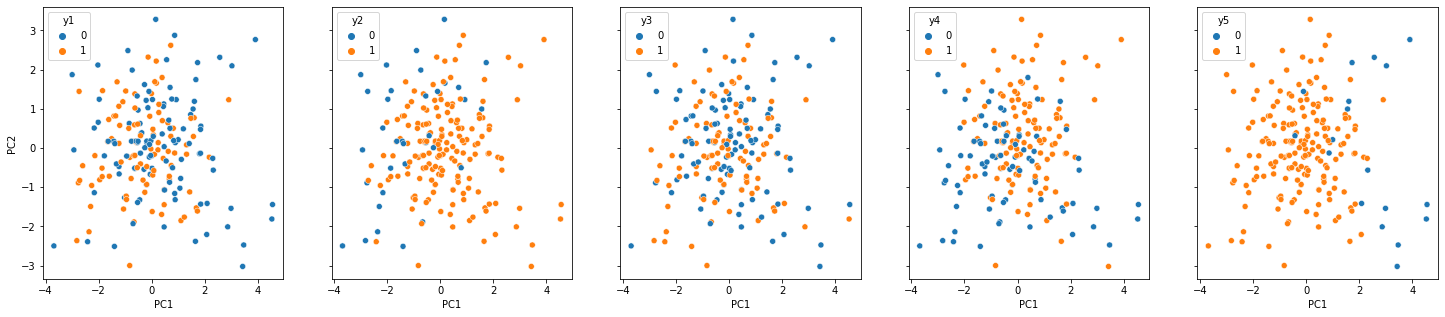

In [4]:
bd.low_dim_visualization("pca")

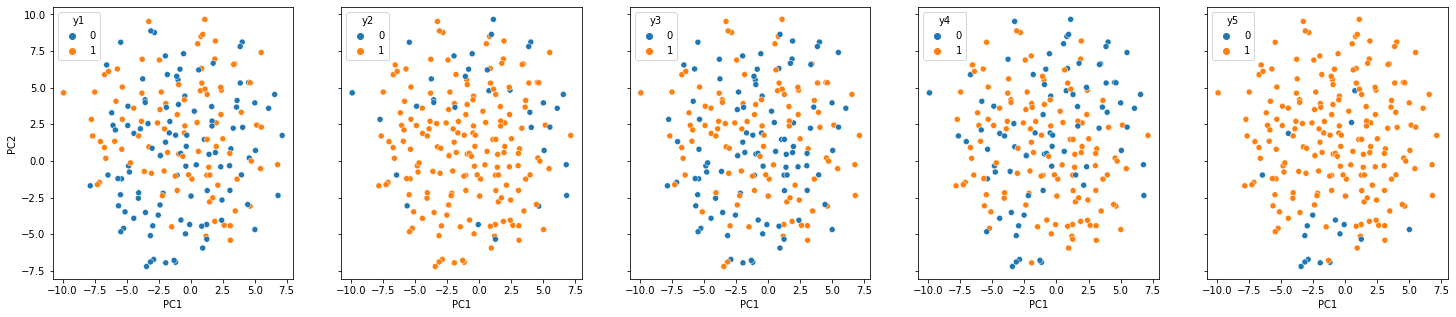

In [5]:
bd.low_dim_visualization("tsne")

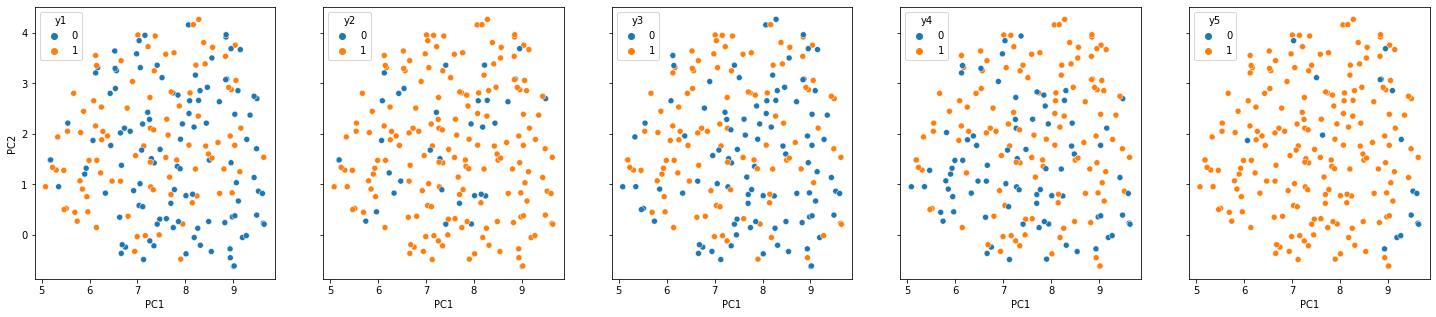

In [6]:
bd.low_dim_visualization("umap")

# Anova test of principal components vs. labels

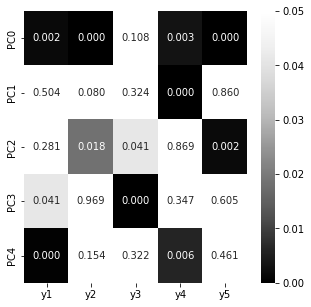

In [7]:
bd.prince_plot()

## classification test of  RF vs a random classifier

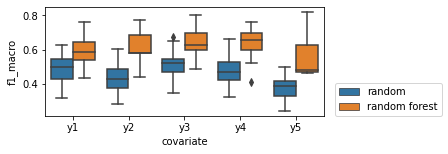

In [8]:
bd.classification_test(scorer="f1_macro")